In [1]:
import os
import shutil
import pandas as pd

In [2]:
##Path##
split_path='/home/NAS_mount/yslee/dataset/augmented_split-flip2'
train_path=os.path.join(split_path,'train')
val_path=os.path.join(split_path,'val')
test_path=os.path.join(split_path,'test')

In [3]:
test=[]
for file in os.listdir(test_path):
    test.append(file.split('_')[0])

In [4]:
pre_path='/home/NAS_mount/yslee/dataset/renamed/preprocessed/'
dataset=[]
for file in os.listdir(pre_path):
    patID=file.split('_')[0]
    if not(patID in dataset):
        dataset.append(patID)

In [5]:
label_file=pd.read_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv')
label_file=label_file.set_index('PatientID_new')

In [6]:
label_file

,PatientID,Tooth,Result,Status,tooth_class
PatientID_new,,,,,
P-1,PM-1,45,1,1,2
P-2,PM-2,44,1,1,1
P-3,PM-3,35,1,1,2
P-4,PM-4,45,1,1,2
P-5,PM-6,34,1,1,1
...,...,...,...,...,...
P-678,EH-158,24,1,1,3
P-679,EH-159,35,1,1,2
P-680,EH-160,35,1,1,2


In [7]:
train_val_test=[]
for patID in dataset:
    if not(label_file['Tooth'][patID]==14 or label_file['Tooth'][patID]==24):
        train_val_test.append(patID)

train_val=[patID for patID in train_val_test if patID not in test]

In [8]:
print('The number of dataset')
print('- Train, Val: ',len(train_val))
print('- Test: ',len(test))

The number of dataset
- Train, Val:  500
- Test:  100


In [9]:
import random
random.shuffle(train_val)

fold1=train_val[0:100]
fold2=train_val[100:200]
fold3=train_val[200:300]
fold4=train_val[300:400]
fold5=train_val[400:500]

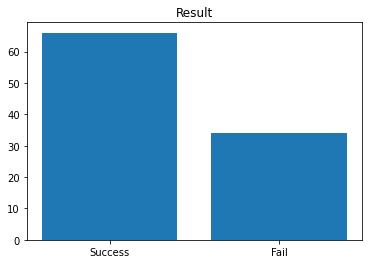

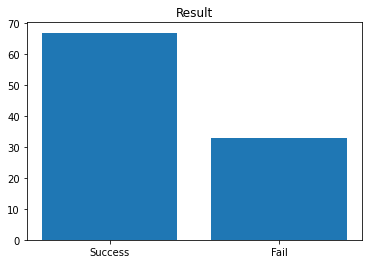

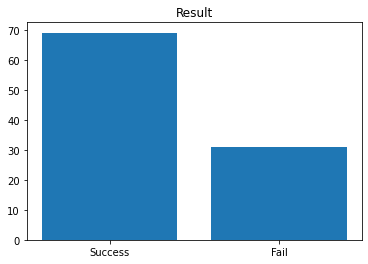

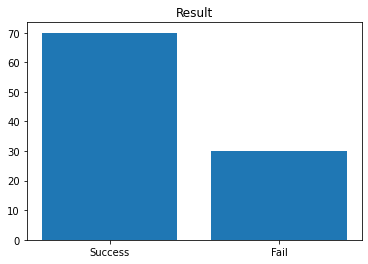

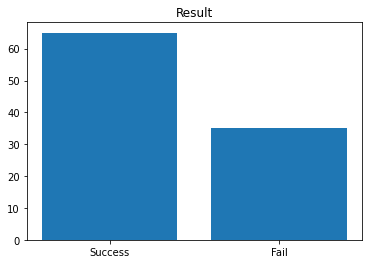

In [10]:
import matplotlib.pyplot as plt
for kfold in [fold1,fold2,fold3,fold4,fold5]:
    suc=0
    fail=0
    for patID in kfold:
        if label_file['Result'][patID]==1:
            fail+=1
        else:
            suc+=1
    plt.title('Result')
    plt.bar(['Success','Fail'],[suc,fail])
    plt.show()

In [15]:
fold1_path='/home/NAS_mount/yslee/dataset/crossval_dataset1-1103flip'
fold2_path='/home/NAS_mount/yslee/dataset/crossval_dataset2-1103flip'
fold3_path='/home/NAS_mount/yslee/dataset/crossval_dataset3-1103flip'
fold4_path='/home/NAS_mount/yslee/dataset/crossval_dataset4-1103flip'
fold5_path='/home/NAS_mount/yslee/dataset/crossval_dataset5-1103flip'

for kfold_path in [fold1_path,fold2_path,fold3_path,fold4_path,fold5_path]:
    if not os.path.isdir(kfold_path):
        os.mkdir(kfold_path)
    if not os.path.isdir(os.path.join(kfold_path,'train')):
        os.mkdir(os.path.join(kfold_path,'train'))
    if not os.path.isdir(os.path.join(kfold_path,'val')):
        os.mkdir(os.path.join(kfold_path,'val'))
    if not os.path.isdir(os.path.join(kfold_path,'test')):
        os.mkdir(os.path.join(kfold_path,'test'))
    
fold1_train_path=os.path.join(fold1_path,'train')
fold1_test_path=os.path.join(fold1_path,'test')
fold1_val_path=os.path.join(fold1_path,'val')

fold2_train_path=os.path.join(fold2_path,'train')
fold2_test_path=os.path.join(fold2_path,'test')
fold2_val_path=os.path.join(fold2_path,'val')

fold3_train_path=os.path.join(fold3_path,'train')
fold3_test_path=os.path.join(fold3_path,'test')
fold3_val_path=os.path.join(fold3_path,'val')

fold4_train_path=os.path.join(fold4_path,'train')
fold4_test_path=os.path.join(fold4_path,'test')
fold4_val_path=os.path.join(fold4_path,'val')

fold5_train_path=os.path.join(fold5_path,'train')
fold5_test_path=os.path.join(fold5_path,'test')
fold5_val_path=os.path.join(fold5_path,'val')

In [12]:
for patID in test:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold1_test_path,patID+'_1.bmp'))
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold2_test_path,patID+'_1.bmp'))
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold3_test_path,patID+'_1.bmp'))
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold4_test_path,patID+'_1.bmp'))
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold5_test_path,patID+'_1.bmp'))

In [14]:
for patID in fold1:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold1_val_path,patID+'_1.bmp'))
for patID in fold2:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold2_val_path,patID+'_1.bmp'))
for patID in fold3:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold3_val_path,patID+'_1.bmp'))
for patID in fold4:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold4_val_path,patID+'_1.bmp'))
for patID in fold5:
    shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold5_val_path,patID+'_1.bmp'))

In [13]:
for kfold in [fold2,fold3,fold4,fold5]:
    for patID in kfold:
        shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold1_train_path,patID+'_1.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_2.bmp'),os.path.join(fold1_train_path,patID+'_2.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_3.bmp'),os.path.join(fold1_train_path,patID+'_3.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_4.bmp'),os.path.join(fold1_train_path,patID+'_4.bmp'))

for kfold in [fold1,fold3,fold4,fold5]:
    for patID in kfold:
        shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold2_train_path,patID+'_1.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_2.bmp'),os.path.join(fold2_train_path,patID+'_2.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_3.bmp'),os.path.join(fold2_train_path,patID+'_3.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_4.bmp'),os.path.join(fold2_train_path,patID+'_4.bmp'))
        
for kfold in [fold1,fold2,fold4,fold5]:
    for patID in kfold:
        shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold3_train_path,patID+'_1.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_2.bmp'),os.path.join(fold3_train_path,patID+'_2.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_3.bmp'),os.path.join(fold3_train_path,patID+'_3.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_4.bmp'),os.path.join(fold3_train_path,patID+'_4.bmp'))

for kfold in [fold1,fold2,fold3,fold5]:
    for patID in kfold:
        shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold4_train_path,patID+'_1.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_2.bmp'),os.path.join(fold4_train_path,patID+'_2.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_3.bmp'),os.path.join(fold4_train_path,patID+'_3.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_4.bmp'),os.path.join(fold4_train_path,patID+'_4.bmp'))

for kfold in [fold1,fold2,fold3,fold4]:
    for patID in kfold:
        shutil.copyfile(os.path.join(pre_path,patID+'_1.bmp'),os.path.join(fold5_train_path,patID+'_1.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_2.bmp'),os.path.join(fold5_train_path,patID+'_2.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_3.bmp'),os.path.join(fold5_train_path,patID+'_3.bmp'))
        shutil.copyfile(os.path.join(pre_path,patID+'_4.bmp'),os.path.join(fold5_train_path,patID+'_4.bmp'))